# Roration of no hermitian mass matrices

Hermitian term:
    
$\mathcal{L}_{\text{mas}} = \psi^{\dagger} M \psi$
$\to$
$M_{\text{diag}}=U^{-1}MU$

No hermitian term:
 
$\mathcal{L}_{\text{mas}} = \psi_R^{\dagger} M \psi_L = \psi_1^{\dagger} M \psi_2$
$\to$ $\color{red}{M_{\text{diag}}^2=V^{-1}MM^TV = U^{-1}M^TMU}$


ie. the $V$ and $U$ matricess diagonalize the matrices $MM^T$ and $M^TM$ respectively

such that: $\Psi_1^i=V_{ij}\psi_1^j$ and $\Psi_2^i=U_{ij}\psi_2^j$

In [1]:
import numpy as np
import pandas as pd
#import commands
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

DM values

In [3]:
#Experimental values for DM: Planck results 2015
e = 3
Omega = 0.1197
Omega_max=Omega + e*0.0022
Omega_min=Omega - e*0.0022
print(Omega, Omega_min,Omega_max)
# out: (0.1197, 0.1131, 0.1263)

0.1197 0.1131 0.1263


# General scrip

In [4]:
#!/usr/bin/env python

#Import run_dicctionary.py
#This file run a lot of dicctionaryes to run SPheno

import pyslha
import pySDdiracDM_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 3

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    MDF = 300.
    MS12 = np.exp(np.random.uniform(np.log(1.*10**(4)),np.log(9.*10**(6))))
    MS22 = 9.0E+06
    LamS1H = 0.0E-04
    LamS2H = 0.0E-04
    LamSPH = 0.0E-04
    LamS = 1.0E-04
    LamSP = 3.0E-01    
    vS = 500.
    YRD = 1.0E-03
    YRC = 5.0E-02
    
    # Modific the LesHouches   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    YRA11 = 1.500000E-02
    YRA12 = 2.000000E-02    
    YRA13 = 1.000000E-02
    
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %YRA11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %YRA12     
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %YRA13 
    
    YRA21 = 3.500000E-03
    YRA22 = 2.000000E-03    
    YRA23 = 1.000000E-03
    
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %YRA21  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %YRA22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %YRA23     

    YRB11 = 1.100000E-04
    YRB12 = 3.000000E-03    
    YRB13 = 1.100000E-03
    
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %YRB11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %YRB12     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %YRB13 
    
    YRB21 = 1.500000E-04
    YRB22 = 3.000000E-03    
    YRB23 = 1.100000E-03
    
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %YRB21  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %YRB22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %YRB23      
    
    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])

    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])
    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,\
              YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13','YRB21'\
                           ,'YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha','mChi1','mChi2'\
                          ,'XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22'])
#xd.to_csv('xd_neutrinos.csv')

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")    

The program spent 4.737895727157593 s running 3 times


In [5]:
xd[['mv1','mv2','mv3','mS1','mS2']][:3]

,mv1,mv2,mv3,mS1,mS2
0,0.000000e+00,1.923882e-13,1.147243e-09,1130.402270,3000.0
1,2.260530e-17,1.938720e-13,1.497317e-09,925.322652,3000.0
2,0.000000e+00,1.973613e-13,5.334705e-09,309.886887,3000.0


In [6]:
SPheno_output.splitlines()

['# SUSY Les Houches Accord 2 - SDdiracDM Spectrum + Decays + Flavor Observables',
 '# SPheno module generated by SARAH',
 '# ----------------------------------------------------------------------',
 '# SPheno v4.0.3  ',
 '#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101',
 '#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573',
 '# SARAH: 4.12.3  ',
 '#   F. Staub; arXiv:0806.0538 (online manual)',
 '#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863',
 '#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840',
 '#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906',
 '#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 ',
 '# Including the calculation of flavor observables based on the FlavorKit ',
 '#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 ',
 '# Two-loop masss corrections to Higgs fields based on ',
 '#   M.

# Analytical rutine for Neutrino mass matriz

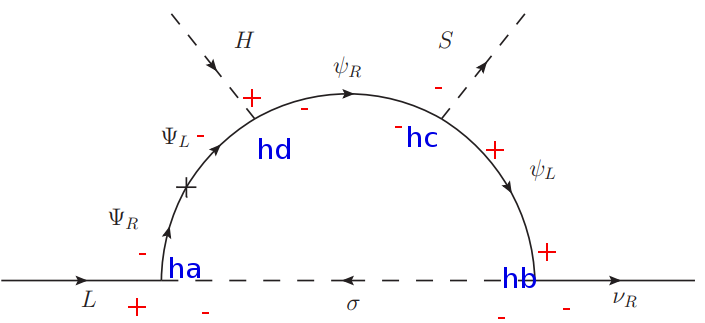

In [9]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.png", width=500)

THREE DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^3
\dfrac{V_{k1}U_{k3}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

In [10]:
###+++++++++ python rutine to get the neutrino eigenvalues +++++++++++++++++++++++++++++

#Loop factor
def Fk(mNk,mSk,Vk2,Uk1):
    
    mk = 1./(16.*np.pi**2)*Vk2*Uk1*(mNk**3/(mNk**2-mSk**2))*np.log(mNk**2/mSk**2)
    
    return mk   

#Mab matrix. sum over i and k is expanded
def Mab(YB1b,YB2b,YA1a,YA2a,m1,m2,ms1,ms2,V12,V22,U11,U21):
    sumS1= (Fk(m1, ms1, V12, U11)+Fk(m2, ms1, V22, U21))*(YB1b*YA1a) 
    
    sumS2= (Fk(m1, ms2, V12, U11)+Fk(m2, ms2, V22, U21))*(YB2b*YA2a) 
    
    return sumS1 + sumS2

def MATRIXDIAG(YB11,YB12,YB13,YB21,YB22,YB23,YA11,YA12,YA13,YA21,YA22,YA23,m1,m2,mS1,mS2,V12,V22,U11,U21):

    #Matrix elements
    M11 = Mab(YB11,YB21,YA11,YA21,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M12 = Mab(YB11,YB21,YA12,YA22,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M13 = Mab(YB11,YB21,YA13,YA23,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M21 = Mab(YB12,YB22,YA11,YA21,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M22 = Mab(YB12,YB22,YA12,YA22,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M23 = Mab(YB12,YB22,YA13,YA23,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M31 = Mab(YB13,YB23,YA11,YA21,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M32 = Mab(YB13,YB23,YA12,YA22,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M33 = Mab(YB13,YB23,YA13,YA23,m1,m2,mS1,mS2,V12,V22,U11,U21)


    Mvij = np.matrix( [[M11, M12, M13],
                       [M21, M22, M23],
                       [M31, M32, M33]] )

    #eigenvalues e eigenvectors
    (Mdiag2,V)=np.linalg.eig(Mvij*np.transpose(Mvij))
    
    #took eigenvalues
    MX1 = np.sqrt(np.abs(Mdiag2[0]))
    MX2 = np.sqrt(np.abs(Mdiag2[1]))
    MX3 = np.sqrt(np.abs(Mdiag2[2]))
    
    ## reorganize the eigenvalues (neutrino masses)
    mn1 = 0.
    mn2 = 0.
    mn3 = 0.

    if MX1 < MX2 and MX1 < MX3:
        mn1 = MX1
        #print "Hola1"

        if MX2 < MX3:
            mn2 = MX2
            mn3 = MX3
        else:
            mn2 = MX3
            mn3 = MX2  

    if MX2 < MX1 and MX2 < MX3:
        mn1 = MX2
        #print "Hola2" 

        if MX1 < MX3:
            mn2 = MX1
            mn3 = MX3
        else:
            mn2 = MX3
            mn3 = MX1   

    if MX3 < MX1 and MX3 < MX2:
        mn1 = MX3
        #print "Hola3"  

        if MX1 < MX2:
            mn2 = MX1
            mn3 = MX2
        else:
            mn2 = MX2
            mn3 = MX1

    #print("Theoretical values found:")        
    #print(mn1, mn2,mn3)   

    return mn1, mn2, mn3

#run all dataframe
MatrixDiag_new=np.vectorize(MATRIXDIAG,excluded={'vev':246.2,'sw':np.sqrt(0.23),'gg':0.653,'LAMBDA':1E16},\
                      doc='Input for pyfunc below: ')

In [11]:
MATRIXDIAG(YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,mChi1,mChi2,mS1,mS2,XV12,XV22,XU11,XU21)

(0.0, 1.9779189504623187e-13, 7.8089912678463459e-09)

In [12]:
#Add to the DataFrame
xd['mn1'] = MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,xd.YRA11,xd.YRA12,xd.YRA13,\
               xd.YRA21,xd.YRA22,xd.YRA23,xd.mChi1,xd.mChi2,xd.mS1,xd.mS2,xd.XV12,xd.XV22,xd.XU11,xd.XU21)[0]
xd['mn2'] = MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,xd.YRA11,xd.YRA12,xd.YRA13,\
               xd.YRA21,xd.YRA22,xd.YRA23,xd.mChi1,xd.mChi2,xd.mS1,xd.mS2,xd.XV12,xd.XV22,xd.XU11,xd.XU21)[1]
xd['mn3'] = MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,xd.YRA11,xd.YRA12,xd.YRA13,\
               xd.YRA21,xd.YRA22,xd.YRA23,xd.mChi1,xd.mChi2,xd.mS1,xd.mS2,xd.XV12,xd.XV22,xd.XU11,xd.XU21)[2]

In [13]:
xd[['mv1','mv2','mv3','mn1','mn2','mn3']][:3]

,mv1,mv2,mv3,mn1,mn2,mn3
0,0.000000e+00,1.974313e-13,5.624323e-09,2.689394e-17,1.974313e-13,5.624323e-09
1,0.000000e+00,1.762668e-13,3.259688e-10,8.119379e-19,1.762668e-13,3.259688e-10
2,1.348075e-16,1.980283e-13,1.047733e-08,4.709640e-17,1.980282e-13,1.047733e-08


In [14]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

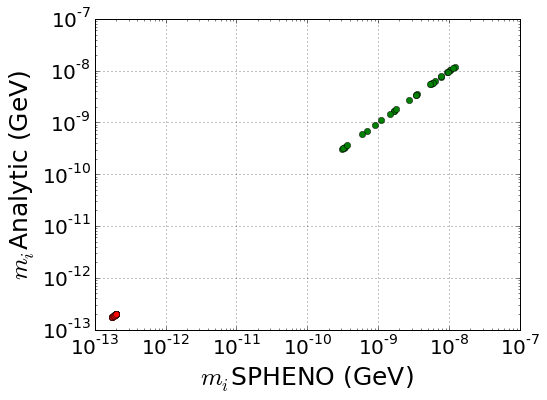

In [15]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mv2,xd.mn2,'ro')
plt.loglog(xd.mv3,xd.mn3,'go')

plt.xlabel(r'$m_i$SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$Analytic (GeV)',size=25)

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')

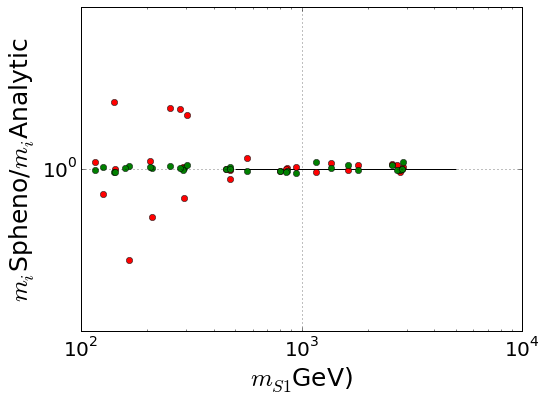

In [18]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog( xd.mS1, xd.mv2/xd.mn2,'ro')
plt.loglog( xd.mS1, xd.mv3/xd.mn3,'go')

plt.hlines(1, 5.0E+02, 5.0E+03)

plt.xlabel(r'$m_{S1}$GeV)',size=25)
plt.ylabel(r'$m_i$Spheno/$m_i$Analytic',size=25)

plt.grid()

plt.ylim(0.9999999,1.0000001)

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')

In [17]:
xd

,MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,...,XV12,XV21,XV22,XU11,XU12,XU21,XU22,mn1,mn2,mn3
0,300,86228.855802,9000000,0,0,0,0.0001,0.3,500,0.001,...,-1,1,0.000034,0.000579,-1,1,0.000579,2.689394e-17,1.974313e-13,5.624323e-09
1,300,7776868.513902,9000000,0,0,0,0.0001,0.3,500,0.001,...,-1,1,0.000034,0.000579,-1,1,0.000579,8.119379e-19,1.762668e-13,3.259688e-10
2,300,19918.859200,9000000,0,0,0,0.0001,0.3,500,0.001,...,-1,1,0.000034,0.000579,-1,1,0.000579,4.709640e-17,1.980282e-13,1.047733e-08
3,300,83750.879396,9000000,0,0,0,0.0001,0.3,500,0.001,...,-1,1,0.000034,0.000579,-1,1,0.000579,3.257018e-17,1.974494e-13,5.704475e-09
4,300,64431.373960,9000000,0,0,0,0.0001,0.3,500,0.001,...,-1,1,0.000034,0.000579,-1,1,0.000579,1.837206e-17,1.975976e-13,6.457721e-09
5,300,7287150.368193,9000000,0,0,0,0.0001,0.3,500,0.001,...,-1,1,0.000034,0.000579,-1,1,0.000579,1.227535e-18,1.772730e-13,3.411032e-10
6,300,20325.792787,9000000,0,0,0,0.0001,0.3,500,0.001,...,-1,1,0.000034,0.000579,-1,1,0.000579,2.598201e-17,1.980231e-13,1.040041e-08
7,300,78873.427003,9000000,0,0,0,0.0001,0.3,500,0.001,...,-1,1,0.000034,0.000579,-1,1,0.000579,2.689394e-17,1.974856e-13,5.871696e-09
8,300,43977.453807,9000000,0,0,0,0.0001,0.3,500,0.001,...,-1,1,0.000034,0.000579,-1,1,0.000579,1.964056e-17,1.977733e-13,7.655623e-09
9,300,1355420.446317,9000000,0,0,0,0.0001,0.3,500,0.001,...,-1,1,0.000034,0.000579,-1,1,0.000579,0.000000e+00,1.921300e-13,1.102412e-09
